# Flow Of Project
# 1 Import Data
# 2 Proprocess Data
# 3 Visualize Data
# 4 Train test split
# 5 Train Model and Avualivation

# Import Necessary Packages

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [162]:
medical_df = pd.read_csv('insurance linear.csv')

In [163]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data:
age: age of the insured person (numeric)                                          
sex: gender of the insured person (categorical: male/female)                                     
bmi: body mass index of the insured person (numeric)                                               
children: number of children covered by the insurance plan (numeric)                                  
smoker: whether or not the insured person is a smoker (categorical: yes/no)                                  
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)                                            
charges: the insurance charges/costs billed to the insured person (numeric)                                                         

# Exploring Data & Analysing Data

In [164]:
medical_df.shape

(1338, 7)

In [165]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [166]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation

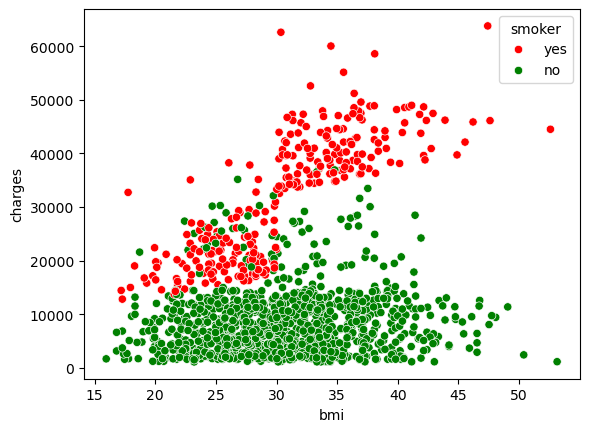

In [167]:
sns.scatterplot(x= 'bmi',y= 'charges',data=medical_df,hue='smoker',palette=['red','green']);

## Smoking status significantly affects insurance costs, and this effect is increased by higher BMI. Therefore, any insurance cost prediction model should carefully incorporate both of these variables to make accurate predictions.







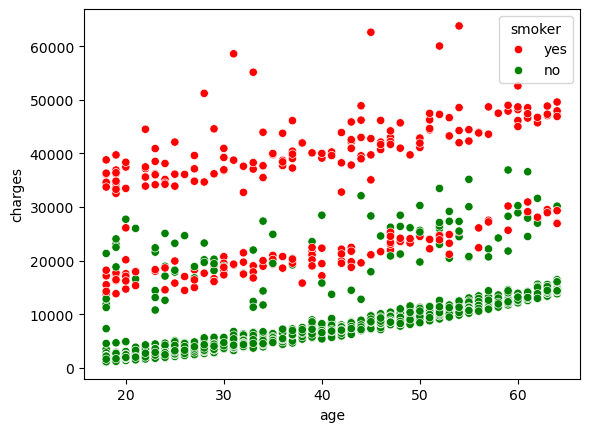

In [168]:
sns.scatterplot(x= 'age',y= 'charges',data=medical_df,hue='smoker',palette=['red','green']);

## Impact of smoking on charges
##### Higher Charges for Smokers: Smokers incur significantly higher insurance charges compared to non-smokers. This difference is consistent across all ages.
##### Wider Range of Charges for Smokers: The charges for smokers show a wider range, indicating that smoking might lead to a variety of health-related issues, thus increasing variability in insurance costs.
## Age related
##### Increasing Charges with Age: For both smokers and non-smokers, insurance charges tend to increase with age. This is likely due to the increasing risk of health issues as individuals get older.
##### Increase Smokers: The increase in charges with age appears more pronounced for smokers. The gap between charges for smokers and non-smokers widens as age increases.
## Clusters
###### Non-Smokers: Non-smokers form a distinct cluster at the lower end of the charge spectrum. The charges for non-smokers increase steadily with age but remain significantly lower than those for smokers.
##### Smokers: Smokers form a more dispersed cluster at the higher end of the charge spectrum. There are several outliers among smokers, indicating extremely high charges.
## Young Smokers vs. Older Smokers:

##### Young Smokers: Even at younger ages, smokers tend to have higher charges compared to their non-smoking peers. This early onset of higher charges may be indicative of early health issues associated with smoking.
##### Older Smokers: For older age groups, smokers exhibit a dramatic increase in charges, suggesting that the cumulative effect of smoking leads to more severe and costly health problems over time.
## Insurance Cost Outliers:

##### There are noticeable outliers among the smoker group, particularly at higher age ranges, where some individuals have extremely high insurance charges. These outliers likely represent cases with severe health complications.
## Implications for Predictive Modeling
##### Inclusion of Smoking Status: Any predictive model for insurance costs must include smoking status as a feature, given its significant impact on charges.
##### Age Interaction: The interaction between age and smoking status should be considered. For example, adding an interaction term between age and smoking status can capture the increasing discrepancy in charges as age increases.
##### Handling Outliers: Special attention should be given to the outliers, particularly among older smokers. Robust modeling techniques or separate modeling for extreme cases may be necessary.
##### Non-Linearity: Given the exponential increase in charges with age for smokers, non-linear models or transformations might be more appropriate for capturing the underlying patterns.

## Both age and smoking status are significant factors affecting insurance costs. Smokers consistently incur higher charges, and this discrepancy increases with age. Therefore, any predictive model should include these variables to accurately estimate insurance costs.

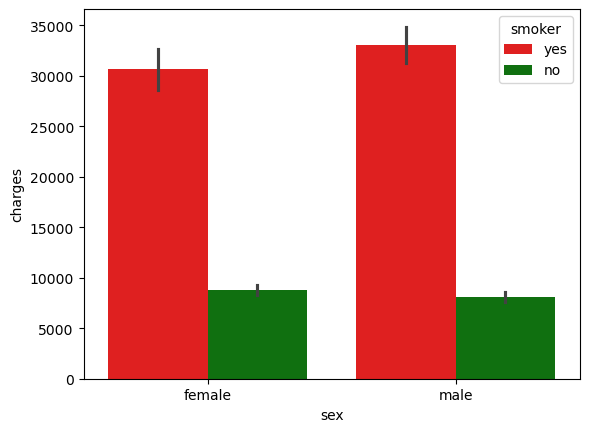

In [169]:
sns.barplot(x= 'sex',y= 'charges',data=medical_df,hue='smoker',palette=['red','green']);

## Smoking satus is a more critical variable than sex. Insurance companies might use this information to prioritize smoking status over sex

<Axes: xlabel='sex', ylabel='charges'>

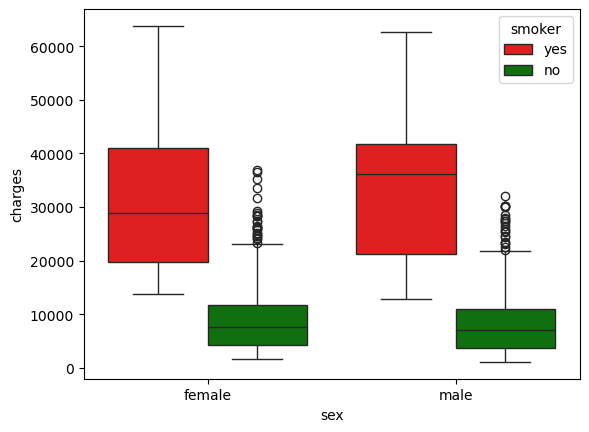

In [170]:
sns.boxplot(x='sex',y='charges',data=medical_df,hue='smoker',palette=['red','green'])

## It indicates that smoking status greatly influences the insurance charges, with smokers showing greater variability and higher median costs. 

<Axes: xlabel='sex', ylabel='bmi'>

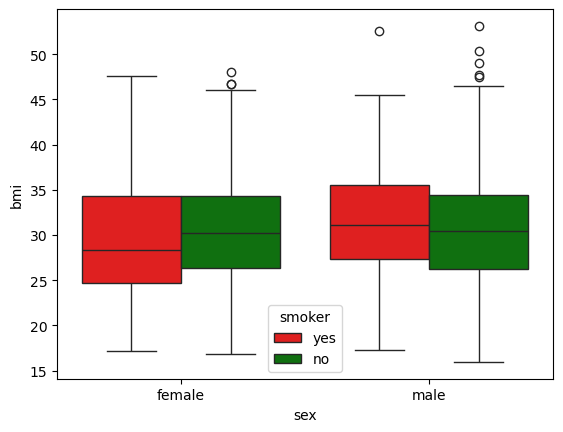

In [171]:
sns.boxplot(x='sex',y='bmi',data=medical_df,hue='smoker',palette=['red','green'])

## BMI does not vary significantly between smokers and non-smokers or between sexes. While BMI is a relevant factor in predicting insurance costs due to its association with health risks, the differences in insurance charges observed earlier are likely influenced more by smoking-related health issues than by BMI alone

In [172]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [173]:
medical_df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.800     8
31.350     8
30.495     8
          ..
39.425     1
40.480     1
38.900     1
47.410     1
19.300     1
Name: count, Length: 548, dtype: int64

In [174]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [175]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


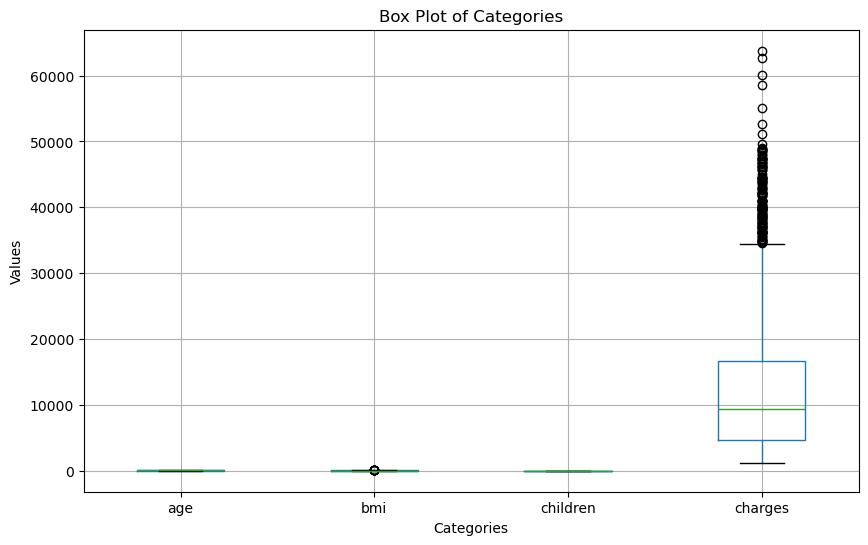

In [176]:
plt.figure(figsize=(10, 6))
medical_df.boxplot()
plt.title('Box Plot of Categories')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# convert categorical column to numerical

In [177]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [178]:
medical_df.replace({'sex':{'male':1,'female':0}},inplace=True)
medical_df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

<Axes: >

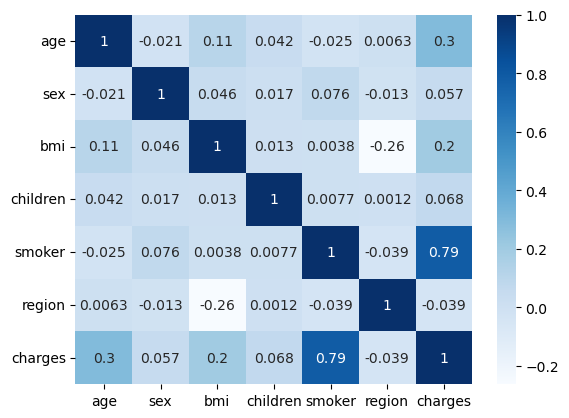

In [179]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True, fmt='.2g', cmap='Blues')

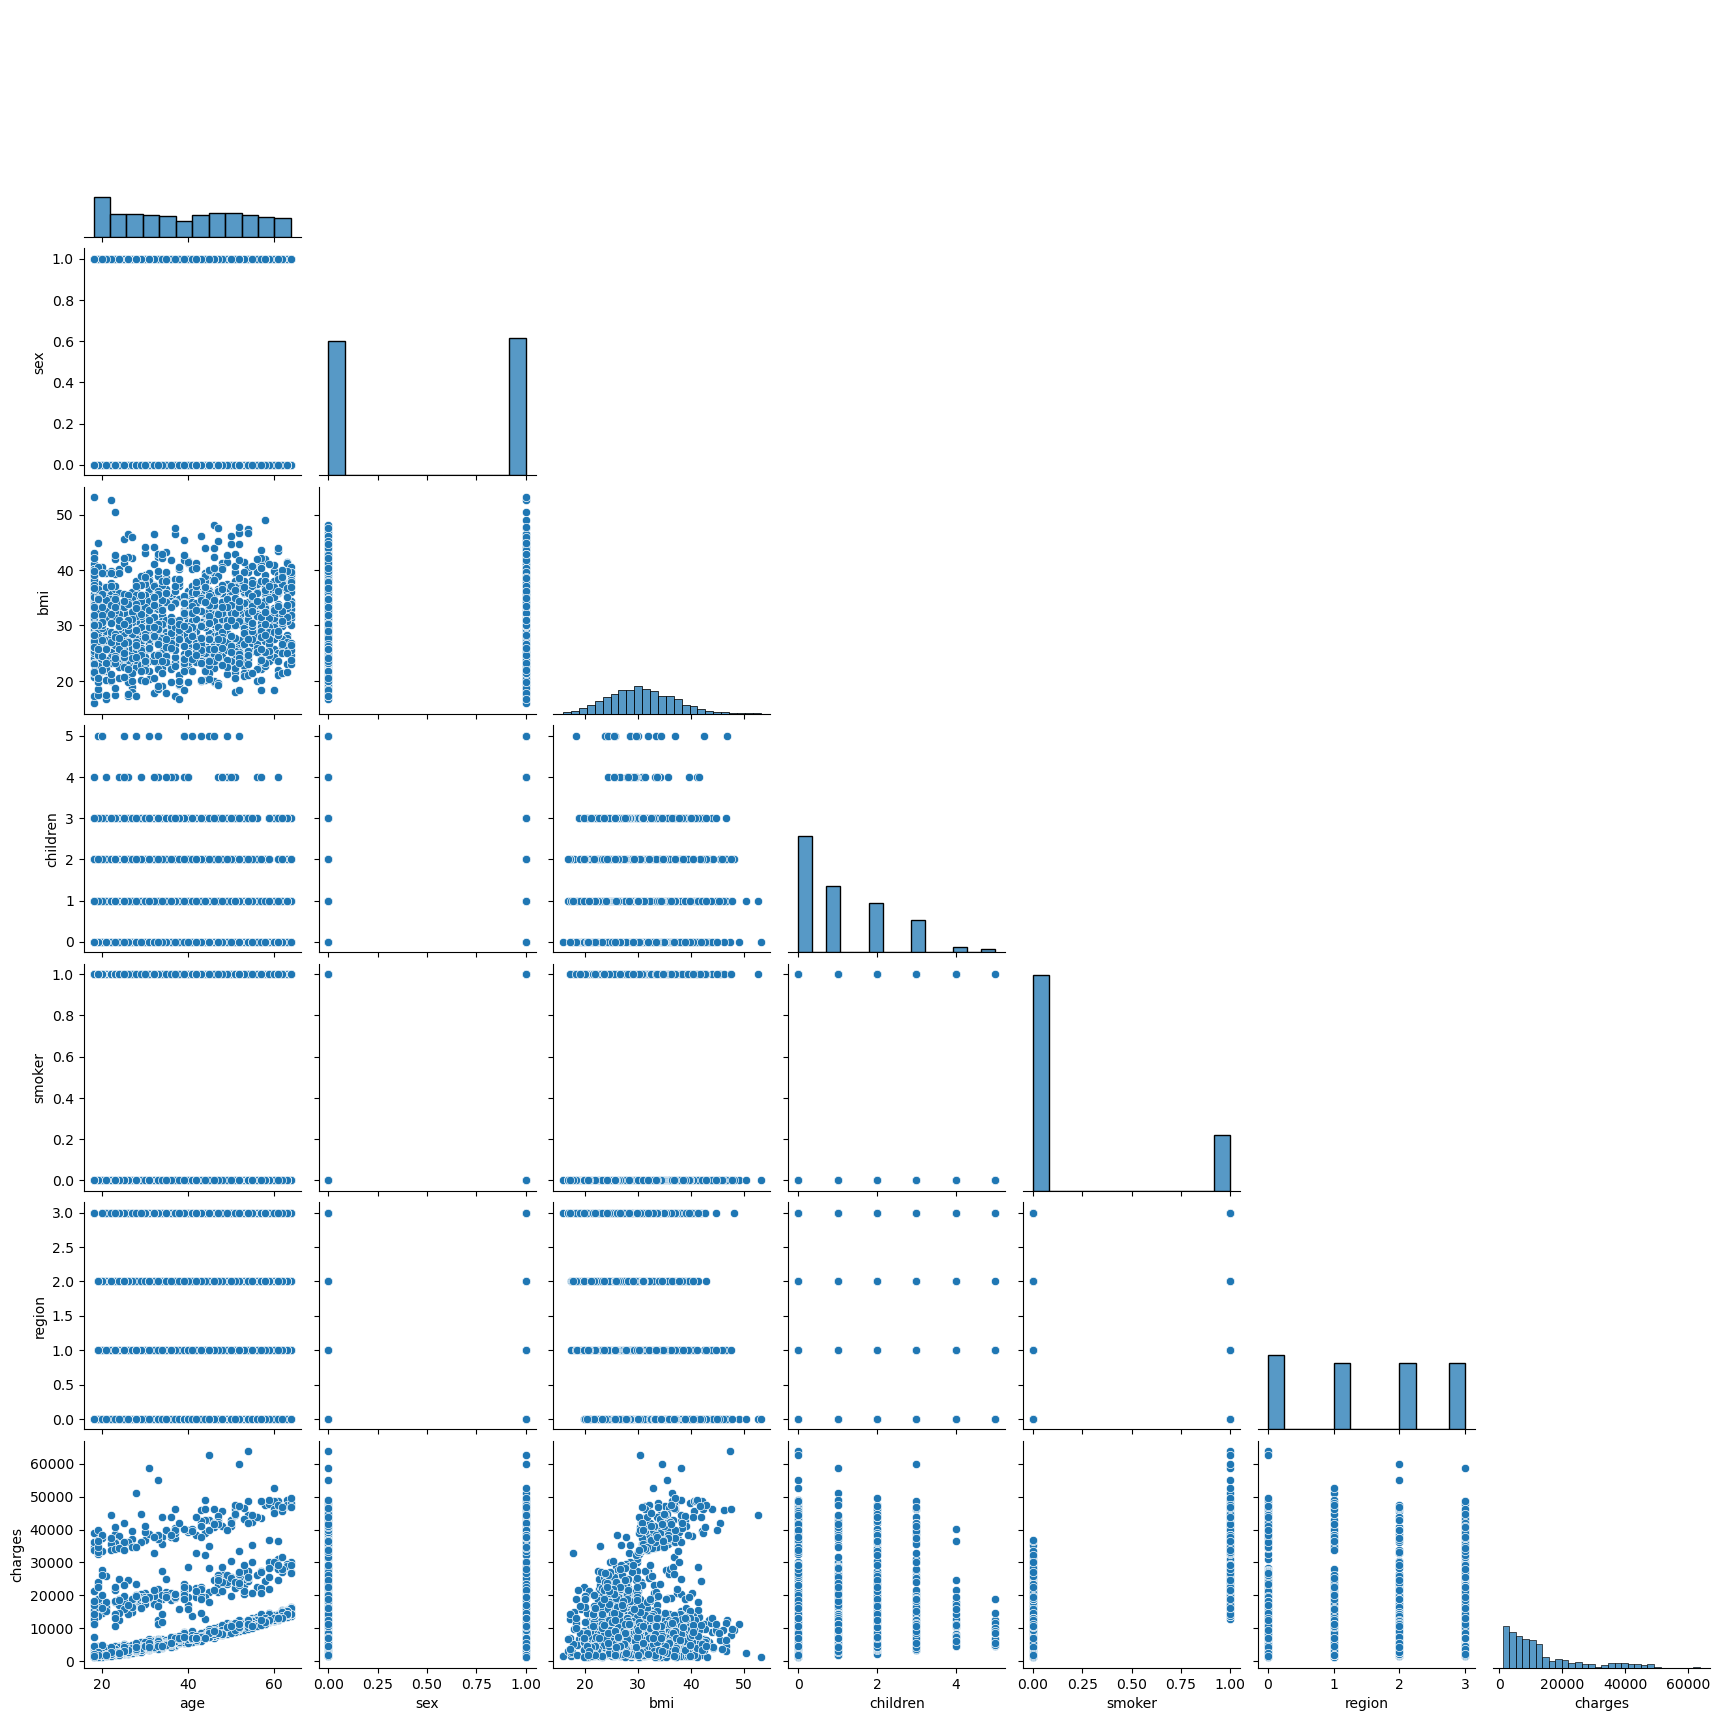

In [180]:
sns.pairplot(data=medical_df, corner=True);

In [181]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


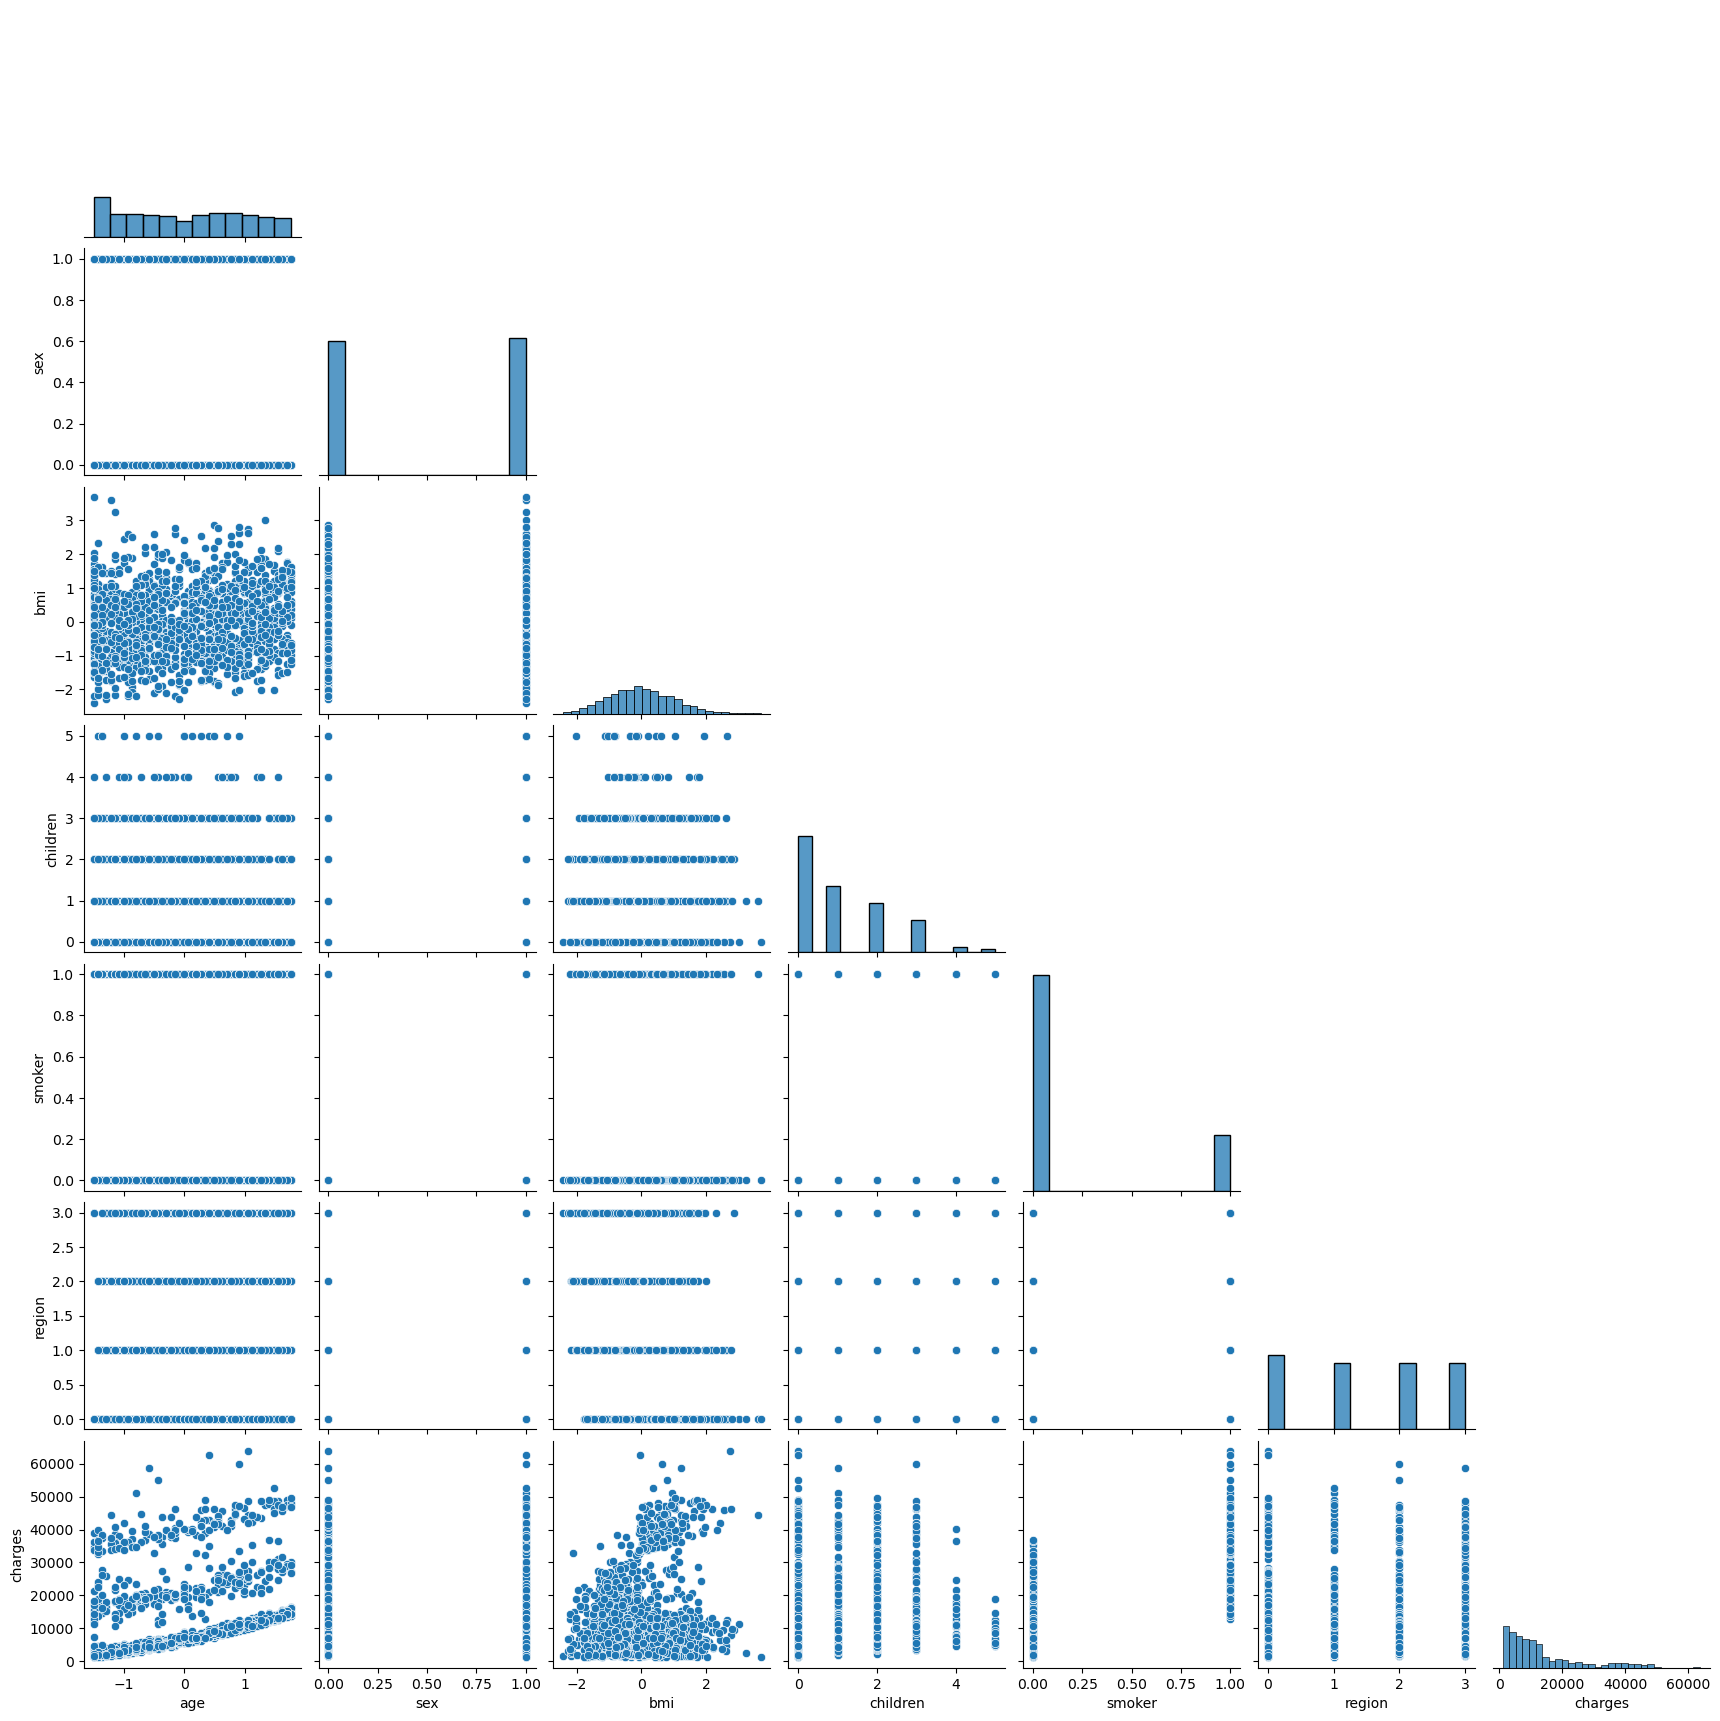

In [182]:
medical_df[['age', 'bmi']] = medical_df[['age', 'bmi']].apply(zscore)

sns.pairplot(data=medical_df, corner=True);

<Axes: >

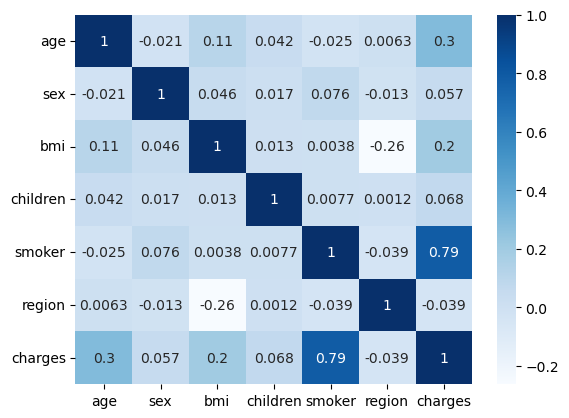

In [183]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True, fmt='.2g', cmap='Blues')

# Train Test Split

In [184]:
import statsmodels.formula.api as smf
from scipy.stats import zscore

In [185]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Scaling Data

In [187]:
X_train.head()

,age,sex,bmi,children,smoker,region
355,0.483668,1,-0.502533,0,0,1
477,-1.011557,1,0.813924,0,0,2
1156,-1.438764,1,2.332155,0,1,0
663,-1.509965,1,0.491576,0,0,0
1216,0.056461,1,-0.915925,0,0,0


In [188]:
train_data = pd.concat((X_train, y_train), axis=1)

In [189]:
expr = 'charges ~ age + sex + bmi + children + smoker + region'

In [190]:
model_2 = smf.ols(formula=expr, data=train_data).fit()

In [191]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     445.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.71e-269
Time:                        19:12:22   Log-Likelihood:                -9472.5
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     929   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7403.5194    432.766     17.107      0.0

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [209]:
X.shape[1]

6

In [210]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF Score'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [213]:
vif_data.sort_values(by='VIF Score', ascending=False)

,feature,VIF Score
5,region,1.781878
1,sex,1.652042
3,children,1.533382
4,smoker,1.207571
2,bmi,1.070433
0,age,1.015909


In [192]:
test_data = pd.concat((X_test, y_test), axis=1)

In [193]:
expr_2 = 'charges ~ age + sex + bmi + children + smoker + region'

In [194]:
test_model = smf.ols(formula=expr_2, data=test_data).fit()

In [195]:
print(test_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.74e-124
Time:                        19:12:23   Log-Likelihood:                -4071.1
No. Observations:                 402   AIC:                             8156.
Df Residuals:                     395   BIC:                             8184.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7243.9835    673.462     10.756      0.0

# VIF - Variance Inflation Factor

In [196]:
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,0,1,1
1,-1.509965,1,0.509621,1,0,0
2,-0.797954,1,0.383307,3,0,0
3,-0.441948,1,-1.305531,0,0,2
4,-0.513149,1,-0.292556,0,0,2


In [197]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [214]:
X_train.shape

(936, 6)

In [215]:
X_test.shape

(402, 6)

In [220]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 70 model will be train
pred_test = lg.predict(X_test) # 30 model will be predicted
pred_train= lg.predict(X_train)

In [221]:
print(lg.score(X_train, y_train))
print()
print(lg.score(X_test, y_test))

0.7420525866105765

0.7664939443661303


In [222]:
lg.coef_

array([ 3431.36301507,  -126.60867343,  2111.39368051,   613.12082736,
       23387.5756152 ,   298.1258747 ])

In [223]:
r2_test=lg.score(X_test,y_test)
r2_test

0.7664939443661303

In [224]:
r2_train=lg.score(X_train,y_train)
r2_train

0.7420525866105765

In [225]:
y_test.shape

(402,)

In [226]:
pred_test.shape

(402,)

In [227]:
pred_train.shape

(936,)

In [229]:
# Calculate MAE
mae = mean_absolute_error(y_test, pred_test)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, pred_test)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4250.066214239165
Mean Squared Error (MSE): 37743576.51995749
Root Mean Squared Error (RMSE): 6143.580106091032


In [230]:
# Calculate MAE
mae = mean_absolute_error(y_train, pred_train)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_train, pred_train)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSEbb
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4194.706409865304
Mean Squared Error (MSE): 36127845.65840521
Root Mean Squared Error (RMSE): 6010.644362995136


In [231]:
from sklearn.linear_model import Ridge

In [258]:
ridgemodel=Ridge(alpha=0.1)

In [259]:
ridgemodel.fit(X_train,y_train)

Ridge(alpha=0.1)

In [260]:
ridgemodel.score(X_train,y_train)

0.742052307746587

In [261]:
ridgemodel.fit(X_test,y_test)

Ridge(alpha=0.1)

In [262]:
ridgemodel.score(X_test,y_test)

0.7733437176810455

In [263]:
from sklearn.linear_model import Lasso

In [264]:
Lasso_model=Lasso(alpha=0.1,tol=0.01)

In [265]:
Lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1, tol=0.01)

In [266]:
for idx,col_name in enumerate(X.columns):
    print(f'The coefficient of {col_name} is {Lasso_model.coef_[idx]}')

The coefficient of age is 3431.290008905615
The coefficient of sex is -126.14286311112978
The coefficient of bmi is 2111.2395549795106
The coefficient of children is 613.0584104348998
The coefficient of smoker is 23386.905505036455
The coefficient of region is 298.00674589145257


In [267]:
Lasso_model.score(X_train,y_train)

0.7420525854909646

In [268]:
Lasso_model.fit(X_test,y_test)

Lasso(alpha=0.1, tol=0.01)

In [269]:
for idx,col_name in enumerate(X.columns):
    print(f'The coefficient of {col_name} is {Lasso_model.coef_[idx]}')

The coefficient of age is 3999.0780954254656
The coefficient of sex is -22.57568625098733
The coefficient of bmi is 2023.9982812277779
The coefficient of children is 125.5271806233044
The coefficient of smoker is 24936.014002285305
The coefficient of region is 587.7816491302739


In [270]:
Lasso_model.score(X_test,y_test)

0.773345195738951

# Prediction System

Mean Absolute Error (MAE): 4250.066214239165
Mean Squared Error (MSE): 37743576.51995749
Root Mean Squared Error (RMSE): 6143.580106091032
R^2 Score: 0.7664939443661303


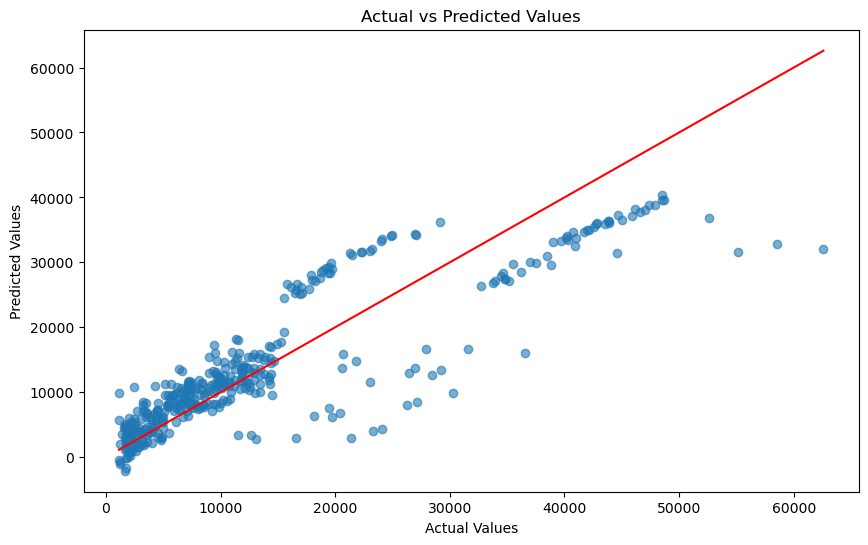

In [273]:
# Calculate MAE
mae = mean_absolute_error(y_test, pred_test)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, pred_test)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R^2 score
r2 = r2_score(y_test, pred_test)
print(f'R^2 Score: {r2}')

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for ideal prediction
plt.show()

##  The model has a reasonable performance, especially at lower values, but struggles with higher values, leading to greater prediction errors.
## The red line (y=x) serves as a reference for perfect predictions. Points along this line represent accurate predictions, while deviations indicate prediction errors.


### Possible Improvements:
### Model retraining with more diverse data.(Medical History,lifestyle and economic factor,Govt. and public health data, insurance claim data etc)
### Using different modeling techniques or algorithms that might handle higher values better(knn).
### Implementing feature engineering or data normalization to improve prediction accuracy.


Mean Absolute Error (MAE): 4194.706409865304
Mean Squared Error (MSE): 36127845.65840521
Root Mean Squared Error (RMSE): 6010.644362995136
R^2 Score: 0.7420525866105765


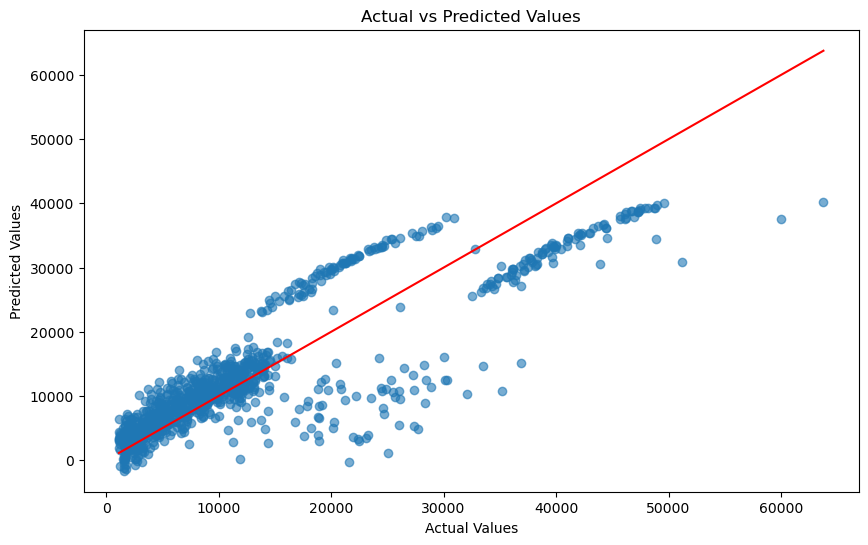

In [274]:
# Calculate MAE
mae = mean_absolute_error(y_train, pred_train)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_train, pred_train)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R^2 score
r2 = r2_score(y_train, pred_train)
print(f'R^2 Score: {r2}')

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, pred_train, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line for ideal prediction
plt.show()

## The model shows a clear pattern in its predictions but exhibits a consistent bias towards underprediction, especially for higher insurance costs. Addressing this bias through data segmentation, feature engineering, and model tuning could significantly improve prediction accuracy.

### Possible improvements
### By developing segment-specific models, incorporating more features, using advanced modeling techniques, and aligning predictions with business strategies, the company can achieve more accurate cost predictions. This not only enhances profitability but also improves customer satisfaction and trust.

In [275]:
input_df = (32, 0, 28.880, 0, 1, 2)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance:", prediction)

Medical Insurance: [202168.01270539]


In [276]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,1,16884.92400
1,-1.509965,1,0.509621,1,0,0,1725.55230
2,-0.797954,1,0.383307,3,0,0,4449.46200
3,-0.441948,1,-1.305531,0,0,2,21984.47061
4,-0.513149,1,-0.292556,0,0,2,3866.85520


In [277]:
input_df = (-1.438764, 0, -0.453320, 0, 1, 1)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance:", prediction)

Medical Insurance: [25195.16229494]
